In [1]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5,8)
import numpy as np
import seaborn as sns
from scipy.stats import mannwhitneyu
import sys
sys.path.append('../')
from parameters import plotting_parameters
plt.rc('xtick', labelsize=plotting_parameters.axis_tick_size()) 
plt.rc('ytick', labelsize=plotting_parameters.axis_tick_size()) 

In [2]:
data = pd.read_csv('../../data/ML_AND_Integration_AND_Multiomics.csv')
data.head()

Unnamed: 0                                 Full name of paper  \
0           0  A gene prioritization method based on a swine ...   
1           1  A hierarchical integration deep flexible neura...   
2           2  A machine learning framework that integrates m...   
3           3  A multi-omics interpretable machine learning m...   
4           4  A Novel MKL Method for GBM Prognosis Predictio...   

                                          Doi  Year  Month  \
0  https://doi.org/10.1038/s42003-020-01233-4  2020      9   
1   https://doi.org/10.1186/s12859-019-3116-7  2019     10   
2  https://doi.org/10.1186/s12859-021-04256-8  2021      6   
3  https://doi.org/10.1038/s41598-020-57691-7  2020      1   
4                   10.1109/JBHI.2019.2898471  2020      1   

                Author email TGCA?  Number citations  \
0    shzhao@mail.hzau.edu.cn   NaN                15   
1         ise_wup@ujn.edu.cn     1                40   
2         zzuliszhen@163.com   NaN                 9   
3     fraenkel-admin@mit.edu   NaN                20   
4   zhangya@mail.ustc.edu.cn   NaN                18   

                                 Other (state which)  Autoencoder  ...  \
0  integrates affinity matrix and network fusion ...          NaN  ...   
1                                                NaN          1.0  ...   
2                                                NaN          NaN  ...   
3                                                NaN          NaN  ...   
4                                                NaN          NaN  ...   

                                Dataset  \
0                                   OWN   
1                TGCA ( BRCA, GBM, OV )   
2  LncRNA expression data from EMBL-EBI   
3                                   OWN   
4                           TCGA-\nGBM    

                                        Dataset2  \
0                                            NaN   
1                                            NaN   
2  HMDD v3.0 database [67] and DisGeNet database   
3                                            NaN   
4                                     cBioportal   

                                            Dataset3  TCGA  OWN  OTHER  \
0                                                NaN   NaN  1.0    NaN   
1                                                NaN   1.0  NaN    NaN   
2  LncRNADisease v2.0 [38], Lnc2Cancer\n\n[13], a...   NaN  NaN    1.0   
3                                                NaN   NaN  1.0    NaN   
4                                                NaN   1.0  NaN    NaN   

   single-paper sets  Updated_DB_TCGA Updated_DB_Other  Updated_DB_exclude  
0                NaN              NaN              1.0                 NaN  
1                NaN              1.0              NaN                 NaN  
2                NaN              NaN              1.0                 NaN  
3                NaN              NaN              1.0                 NaN  
4                NaN              1.0              NaN                 NaN  

[5 rows x 206 columns]

In [3]:
relevant_dimensionality_cols = ['Rows',	'Columns',	'No_rows',	'No_columns']
relevant_DB_cols = ['Updated_DB_TCGA',	'Updated_DB_Other'	,'Updated_DB_exclude']

In [4]:
dim_data = data.copy()
for col in dim_data.columns:
    if col not in relevant_dimensionality_cols and col not in relevant_DB_cols:
        dim_data = dim_data.drop(col, axis=1)
dim_data

Rows  Columns  No_rows  No_columns  Updated_DB_TCGA  \
0    842.000000   1542.0      NaN         NaN              NaN   
1    139.666667  32502.0      NaN         NaN              1.0   
2           NaN      NaN      1.0         1.0              NaN   
3           NaN  21513.0      1.0         NaN              NaN   
4    125.000000  65088.0      NaN         NaN              1.0   
..          ...      ...      ...         ...              ...   
95   208.000000  48868.0      NaN         NaN              NaN   
96  2000.000000  19437.0      NaN         NaN              NaN   
97   616.000000    995.0      NaN         NaN              NaN   
98   253.000000   7716.0      NaN         NaN              1.0   
99   747.000000   7129.0      NaN         NaN              1.0   

    Updated_DB_Other  Updated_DB_exclude  
0                1.0                 NaN  
1                NaN                 NaN  
2                1.0                 NaN  
3                1.0                 NaN  
4                NaN                 NaN  
..               ...                 ...  
95               1.0                 NaN  
96               1.0                 NaN  
97               NaN                 1.0  
98               NaN                 NaN  
99               NaN                 NaN  

[100 rows x 7 columns]

In [5]:
combined_col = []

for index, row in dim_data.iterrows():

    if row['Updated_DB_TCGA'] == 1:
        combined_col.append('TCGA')
    elif row['Updated_DB_Other']:
        combined_col.append('Other')
    else:
        combined_col.append('N/a')


In [6]:
dim_data['Plotting_dataset'] = combined_col

In [7]:
data_full_values = dim_data.query(" No_rows != 1 and No_columns != 1 and Updated_DB_exclude != 1")
data_full_values

Rows        Columns  No_rows  No_columns  Updated_DB_TCGA  \
0     842.000000    1542.000000      NaN         NaN              NaN   
1     139.666667   32502.000000      NaN         NaN              1.0   
4     125.000000   65088.000000      NaN         NaN              1.0   
5     342.000000  102112.000000      NaN         NaN              1.0   
6      27.000000   45463.000000      NaN         NaN              NaN   
8     770.000000   10462.000000      NaN         NaN              1.0   
9     606.000000   42666.000000      NaN         NaN              1.0   
11    190.000000    2715.000000      NaN         NaN              NaN   
12    369.000000   35877.000000      NaN         NaN              NaN   
14    182.000000   10189.333333      NaN         NaN              NaN   
15    356.000000   33265.000000      NaN         NaN              1.0   
16    404.000000   19332.333333      NaN         NaN              1.0   
18    399.000000   67920.000000      NaN         NaN              1.0   
19    761.000000   10546.000000      NaN         NaN              1.0   
20   9081.000000  450804.000000      NaN         NaN              1.0   
21   1314.000000  567670.000000      NaN         NaN              1.0   
25    286.000000   96812.588235      NaN         NaN              1.0   
26    215.000000   82887.000000      NaN         NaN              1.0   
28   3842.000000    7835.000000      NaN         NaN              NaN   
29    498.000000   39102.000000      NaN         NaN              NaN   
31   3905.000000  485577.000000      NaN         NaN              NaN   
32    276.000000   31482.000000      NaN         NaN              1.0   
33    483.000000   67078.000000      NaN         NaN              1.0   
34    134.000000  432312.000000      NaN         NaN              1.0   
35    583.000000   13662.000000      NaN         NaN              NaN   
36    299.000000   37702.000000      NaN         NaN              1.0   
41    314.000000     235.000000      NaN         NaN              1.0   
42   5032.000000   60237.000000      NaN         NaN              1.0   
43   4154.000000    9844.000000      NaN         NaN              1.0   
44    375.000000     178.000000      NaN         NaN              NaN   
47    420.000000   37638.000000      NaN         NaN              1.0   
50    419.000000   93300.000000      NaN         NaN              1.0   
52    613.000000   61255.000000      NaN         NaN              1.0   
54    501.000000   21775.000000      NaN         NaN              1.0   
58    481.000000   64398.000000      NaN         NaN              1.0   
59    308.000000   72884.000000      NaN         NaN              1.0   
60    305.000000   33564.000000      NaN         NaN              1.0   
62    428.000000   10783.000000      NaN         NaN              NaN   
64   7862.000000    9844.000000      NaN         NaN              1.0   
68    465.000000   84897.000000      NaN         NaN              1.0   
69   8072.000000  458540.000000      NaN         NaN              1.0   
72    542.000000   22923.000000      NaN         NaN              1.0   
73    590.000000   20000.000000      NaN         NaN              1.0   
74    359.000000   45582.000000      NaN         NaN              1.0   
75    402.000000   81016.000000      NaN         NaN              1.0   
78   1791.000000    3428.000000      NaN         NaN              NaN   
82   4929.000000     464.000000      NaN         NaN              NaN   
84    344.000000    9243.000000      NaN         NaN              1.0   
87     12.000000   22000.000000      NaN         NaN              NaN   
89    130.000000   51260.000000      NaN         NaN              NaN   
90  10005.000000   17186.000000      NaN         NaN              1.0   
91    765.000000   85254.000000      NaN         NaN              1.0   
92  22728.000000   17513.000000      NaN         NaN              NaN   
93    489.000000   20799.000000      NaN         NaN              NaN 

In [8]:
colours = plotting_parameters.dataset_colours()

In [9]:
colours

{'TCGA': (0.19215686274509805, 0.44313725490196076, 0.6784313725490196),
 'Combination': (0.7529411764705882, 0.48627450980392156, 0.7215686274509804),
 'Other': (0.7764705882352941, 0.396078431372549, 0.14901960784313725),
 'Single': (0.27450980392156865, 0.611764705882353, 0.4627450980392157),
 'Own': (0.8274509803921568, 0.5764705882352941, 0.20392156862745098)}

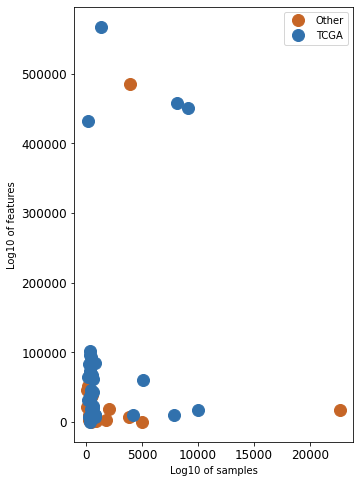

In [10]:
x = data_full_values.Rows.values
y = data_full_values.Columns.values
labels = data_full_values.Plotting_dataset.values
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    
    this_label = group.label.unique()
    if this_label == 'TCGA':
        c=colours['TCGA']
    elif this_label == 'Other':
        c=colours['Other']

    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name, c=c)
ax.legend()
plt.xlabel("Log10 of samples")
plt.ylabel("Log10 of features")
plt.savefig("../../figures/RQ3_2_databases_scatter_all_tcga_other.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/RQ3_2_databases_scatter_all_tcga_other.pdf", dpi=400, bbox_inches = "tight")

In [11]:
merged_dataset = data_full_values

In [12]:
data_full_values.mean(axis=0)

/var/folders/wl/hg987ghd6mz8h66gkk6xwp180000gn/T/ipykernel_27624/2910205509.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data_full_values.mean(axis=0)


Rows                   1766.752874
Columns               73996.435429
No_rows                        NaN
No_columns                     NaN
Updated_DB_TCGA           1.000000
Updated_DB_Other          1.000000
Updated_DB_exclude             NaN
dtype: float64

In [13]:
data_full_values.head()

Rows   Columns  No_rows  No_columns  Updated_DB_TCGA  \
0  842.000000    1542.0      NaN         NaN              NaN   
1  139.666667   32502.0      NaN         NaN              1.0   
4  125.000000   65088.0      NaN         NaN              1.0   
5  342.000000  102112.0      NaN         NaN              1.0   
6   27.000000   45463.0      NaN         NaN              NaN   

   Updated_DB_Other  Updated_DB_exclude Plotting_dataset  
0               1.0                 NaN            Other  
1               NaN                 NaN             TCGA  
4               NaN                 NaN             TCGA  
5               NaN                 NaN             TCGA  
6               1.0                 NaN            Other

In [14]:
data_full_values_tcga = data_full_values.query("Plotting_dataset == 'TCGA'")
data_full_values_tcga.head()

Rows   Columns  No_rows  No_columns  Updated_DB_TCGA  \
1  139.666667   32502.0      NaN         NaN              1.0   
4  125.000000   65088.0      NaN         NaN              1.0   
5  342.000000  102112.0      NaN         NaN              1.0   
8  770.000000   10462.0      NaN         NaN              1.0   
9  606.000000   42666.0      NaN         NaN              1.0   

   Updated_DB_Other  Updated_DB_exclude Plotting_dataset  
1               NaN                 NaN             TCGA  
4               NaN                 NaN             TCGA  
5               NaN                 NaN             TCGA  
8               NaN                 NaN             TCGA  
9               NaN                 NaN             TCGA

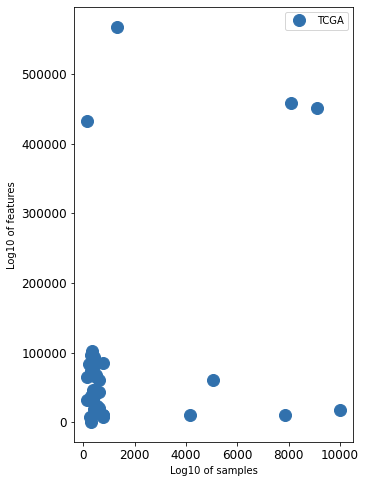

In [15]:
x = data_full_values_tcga.Rows.values
y = data_full_values_tcga.Columns.values
labels = data_full_values_tcga.Plotting_dataset.values
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name, c=colours['TCGA'])
ax.legend()
plt.xlabel("Log10 of samples")
plt.ylabel("Log10 of features")
plt.savefig("../../figures/RQ3_2_databases_scatter_no_tcga.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/RQ3_2_databases_scatter_no_tcga.pdf", dpi=400, bbox_inches = "tight")

In [16]:
merged_dataset.head()

Rows   Columns  No_rows  No_columns  Updated_DB_TCGA  \
0  842.000000    1542.0      NaN         NaN              NaN   
1  139.666667   32502.0      NaN         NaN              1.0   
4  125.000000   65088.0      NaN         NaN              1.0   
5  342.000000  102112.0      NaN         NaN              1.0   
6   27.000000   45463.0      NaN         NaN              NaN   

   Updated_DB_Other  Updated_DB_exclude Plotting_dataset  
0               1.0                 NaN            Other  
1               NaN                 NaN             TCGA  
4               NaN                 NaN             TCGA  
5               NaN                 NaN             TCGA  
6               1.0                 NaN            Other

In [17]:
merged_dataset.columns

Index(['Rows', 'Columns', 'No_rows', 'No_columns', 'Updated_DB_TCGA',
       'Updated_DB_Other', 'Updated_DB_exclude', 'Plotting_dataset'],
      dtype='object')

In [18]:
['Plotting_dataset', 'Plotting_dataset_colour', 'Log10 features', 'Log10 of columns',
       'No_rows', 'No_columns']

['Plotting_dataset',
 'Plotting_dataset_colour',
 'Log10 features',
 'Log10 of columns',
 'No_rows',
 'No_columns']

In [19]:
row_merged_dataset = merged_dataset.copy()
row_merged_dataset = row_merged_dataset.query("Rows > 0")
row_merged_dataset.head()

Rows   Columns  No_rows  No_columns  Updated_DB_TCGA  \
0  842.000000    1542.0      NaN         NaN              NaN   
1  139.666667   32502.0      NaN         NaN              1.0   
4  125.000000   65088.0      NaN         NaN              1.0   
5  342.000000  102112.0      NaN         NaN              1.0   
6   27.000000   45463.0      NaN         NaN              NaN   

   Updated_DB_Other  Updated_DB_exclude Plotting_dataset  
0               1.0                 NaN            Other  
1               NaN                 NaN             TCGA  
4               NaN                 NaN             TCGA  
5               NaN                 NaN             TCGA  
6               1.0                 NaN            Other

In [20]:
column_merged_dataset = merged_dataset.copy()
column_merged_dataset = column_merged_dataset.query("Columns > 0")
column_merged_dataset.head()

Rows   Columns  No_rows  No_columns  Updated_DB_TCGA  \
0  842.000000    1542.0      NaN         NaN              NaN   
1  139.666667   32502.0      NaN         NaN              1.0   
4  125.000000   65088.0      NaN         NaN              1.0   
5  342.000000  102112.0      NaN         NaN              1.0   
6   27.000000   45463.0      NaN         NaN              NaN   

   Updated_DB_Other  Updated_DB_exclude Plotting_dataset  
0               1.0                 NaN            Other  
1               NaN                 NaN             TCGA  
4               NaN                 NaN             TCGA  
5               NaN                 NaN             TCGA  
6               1.0                 NaN            Other

In [21]:
row_merged_dataset.head()

Rows   Columns  No_rows  No_columns  Updated_DB_TCGA  \
0  842.000000    1542.0      NaN         NaN              NaN   
1  139.666667   32502.0      NaN         NaN              1.0   
4  125.000000   65088.0      NaN         NaN              1.0   
5  342.000000  102112.0      NaN         NaN              1.0   
6   27.000000   45463.0      NaN         NaN              NaN   

   Updated_DB_Other  Updated_DB_exclude Plotting_dataset  
0               1.0                 NaN            Other  
1               NaN                 NaN             TCGA  
4               NaN                 NaN             TCGA  
5               NaN                 NaN             TCGA  
6               1.0                 NaN            Other

In [22]:
colours['Other']

(0.7764705882352941, 0.396078431372549, 0.14901960784313725)

/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 5.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/homebrew/Caskroom/miniforge/base/envs/py38/lib/python3.8/site-packages/seaborn/categorical.py:1296: UserWarning: 46.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


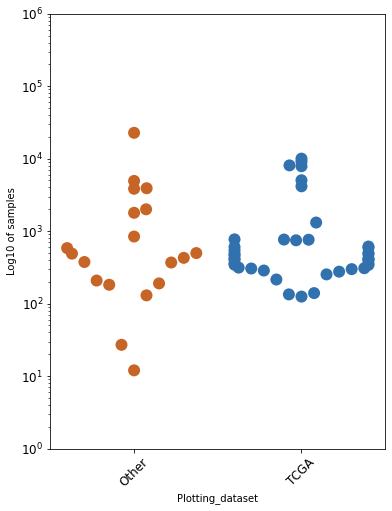

In [23]:
fig, axs = plt.subplots(figsize = (6,8))
axs = sns.swarmplot(data=row_merged_dataset, 
                    y="Rows", 
                    x= "Plotting_dataset", 
                    s=12, 
                    palette=dict(Other = colours['Other'], 
                                 TCGA = colours['TCGA']))
plt.ylim(bottom = 10**0, top = 10**6)
axs.set_yscale('log')
plt.xticks(rotation=45)
plt.ylabel("Log10 of samples")
plt.savefig("../../figures/Databases_samples.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Databases_samples.pdf", dpi=400, bbox_inches = "tight")

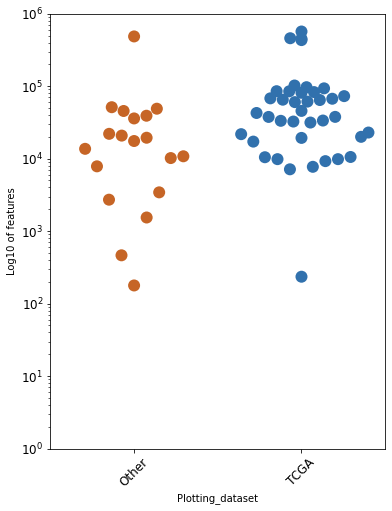

In [24]:
fig, axs = plt.subplots(figsize = (6,8))
axs = sns.swarmplot(data=column_merged_dataset, 
                    y="Columns", 
                    x= "Plotting_dataset", 
                    s=12,
                    palette=dict(Other = colours['Other'], 
                                TCGA = colours['TCGA']))
plt.ylim(bottom = 10**0, top = 10**6)
axs.set_yscale('log')
plt.xticks(rotation=45)
plt.ylabel("Log10 of features")
plt.savefig("../../figures/Databases_features.png", dpi=400, bbox_inches = "tight")
plt.savefig("../../figures/Databases_features.pdf", dpi=400, bbox_inches = "tight")

In [25]:
print("median {}".format(np.median(merged_dataset.Rows)))

median 446.5


In [26]:
print("median {}".format(np.median(merged_dataset.Columns)))

median 33414.5


In [27]:
print("mean {}".format(np.mean(merged_dataset.Rows)))

mean 1766.7528735632181


In [28]:
print("mean {}".format(np.mean(merged_dataset.Columns)))

mean 73996.43542934414


In [29]:
tcga_features = merged_dataset.query("Updated_DB_TCGA == 1").Columns
other_features = merged_dataset.query("Updated_DB_Other == 1").Columns

In [30]:
tcga_samples = merged_dataset.query("Updated_DB_TCGA == 1").Rows
other_samples = merged_dataset.query("Updated_DB_Other == 1").Rows

In [31]:
U1, p = mannwhitneyu(tcga_features, other_features)
p

0.005861417925305518

In [32]:
U1, p = mannwhitneyu(tcga_samples, other_samples)
p

0.9794556978413598